## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' ,header=1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [44]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [6]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [40]:
df[['Region']]=df[['Region']].astype(int)

In [67]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [47]:
# df.isnull().sum()
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [54]:
df[['ISI']]=df[['ISI']].astype(int)
df['ISI']

0      1
1      1
2      0
3      0
4      1
      ..
238    4
239    0
240    0
241    1
242    1
Name: ISI, Length: 243, dtype: int64

In [55]:
df.loc[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4,9.0,4.1,fire,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1,6.8,0.9,not fire,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0,3.0,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0,2.4,0.1,not fire,0


In [60]:
df.iloc[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0,2.6,0.1,not fire,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2,5.6,1.0,not fire,1
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1,6.5,0.9,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1,5.1,0.7,not fire,1


In [62]:
## Removing the null values

df=df.dropna().reset_index(drop=True)


In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [68]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [88]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2,5.6,1.0,not fire,1


In [84]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [79]:
df.shape

(241, 15)

In [89]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2,5.6,1.0,not fire,1


In [90]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [91]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    int64  
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 28.3+ KB


#### Changes the required columns as integer data type

In [93]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [94]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    int64  
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 28.3+ KB


#### Changing the other columns to float data datatype


In [96]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [97]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    int64  
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 28.3+ KB


In [99]:
objects

['Classes']

In [100]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,240.000000,240.000000,240.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,15.933333,7.520833,2012.0,32.175000,61.883333,15.525000,0.744583,78.142500,14.833333,49.950417,4.383333,16.864583,7.121250,0.491667
std,8.761110,1.108914,0.0,3.642296,14.846598,2.813484,2.003149,14.177495,12.394305,47.734390,4.139176,14.231127,7.446968,0.500975
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.675000,5.950000,14.700000,1.000000,6.175000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.350000,33.750000,3.000000,12.500000,4.800000,0.000000
75%,23.250000,8.250000,2012.0,35.000000,73.250000,17.000000,0.425000,88.300000,20.900000,71.075000,7.000000,22.900000,11.675000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [102]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0.5,not fire,0


In [103]:
## Let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

##  Exploratory Data Analysis

In [106]:
## drop day,month and year
df_copy=df.drop(['day','month','year'],axis=1)

In [107]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0.5,not fire,0


In [110]:
## categories in classes
df_copy['Region'].value_counts()

Region
0    122
1    118
Name: count, dtype: int64

In [111]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [112]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0.5,0,0


In [113]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
235,30,65,14,0.0,85.4,16.0,44.5,4,16.9,6.5,1,1
236,28,87,15,4.4,41.1,6.5,8.0,0,6.2,0.0,0,1
237,27,87,29,0.5,45.9,3.5,7.9,0,3.4,0.2,0,1
238,24,54,18,0.1,79.7,4.3,15.2,1,5.1,0.7,0,1
239,24,64,15,0.2,67.3,3.8,16.5,1,4.8,0.5,0,1


In [114]:
df_copy['Classes'].value_counts()

Classes
1    137
0    103
Name: count, dtype: int64

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


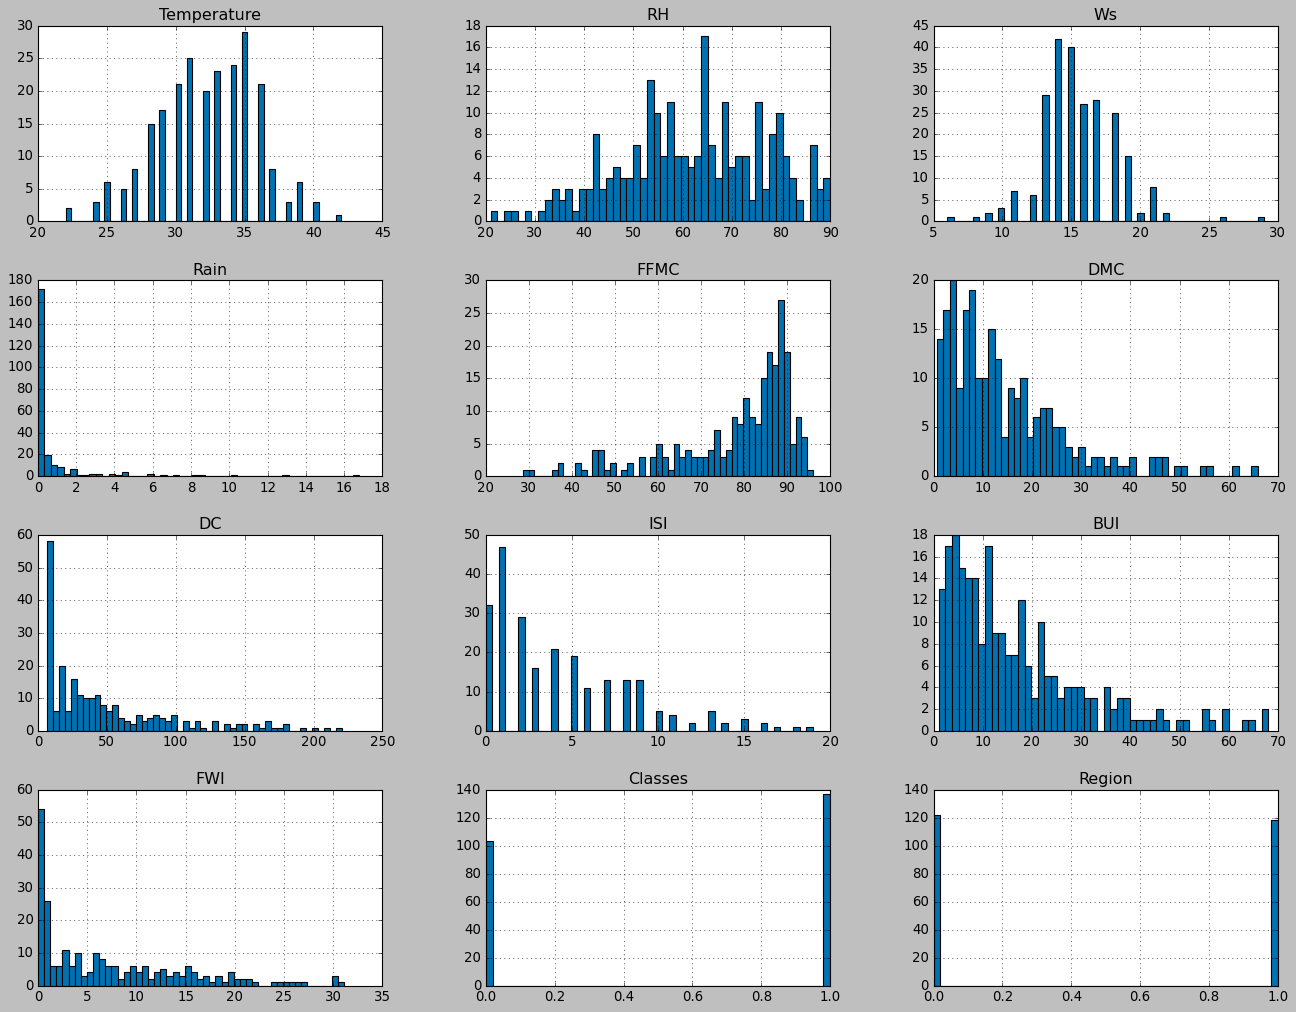

In [126]:
## Plot desnity plot for all features
print(plt.style.available)
plt.style.use('seaborn-v0_8-colorblind')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [129]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    57.083333
0    42.916667
Name: proportion, dtype: float64

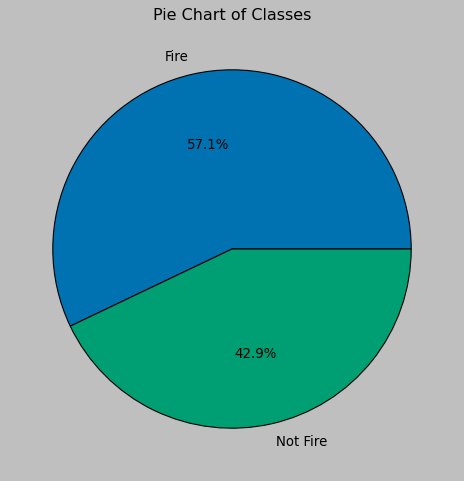

In [130]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [ ]:
## Correlation

In [131]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.649802,-0.291140,-0.323022,0.678971,0.483523,0.373420,0.600829,0.457422,0.565171,0.514226,0.278260
RH,-0.649802,1.000000,0.255299,0.216739,-0.640929,-0.402397,-0.219748,-0.682109,-0.347170,-0.577025,-0.425591,-0.418104
Ws,-0.291140,0.255299,1.000000,0.180838,-0.188755,-0.011795,0.070162,-0.006575,0.020802,0.022351,-0.083729,-0.172026
Rain,-0.323022,0.216739,0.180838,1.000000,-0.541563,-0.283254,-0.293190,-0.334774,-0.294472,-0.319623,-0.373995,-0.049869
FFMC,0.678971,-0.640929,-0.188755,-0.541563,1.000000,0.597287,0.500500,0.725055,0.585522,0.687824,0.765653,0.249356
DMC,0.483523,-0.402397,-0.011795,-0.283254,0.597287,1.000000,0.874645,0.675685,0.982032,0.874453,0.579844,0.207052
DC,0.373420,-0.219748,0.070162,-0.293190,0.500500,0.874645,1.000000,0.497182,0.941429,0.736874,0.505201,-0.068525
ISI,0.600829,-0.682109,-0.006575,-0.334774,0.725055,0.675685,0.497182,1.000000,0.636372,0.920230,0.724491,0.286053
BUI,0.457422,-0.347170,0.020802,-0.294472,0.585522,0.982032,0.941429,0.636372,1.000000,0.856361,0.580889,0.102985
FWI,0.565171,-0.577025,0.022351,-0.319623,0.687824,0.874453,0.736874,0.920230,0.856361,1.000000,0.715682,0.211173


<Axes: >

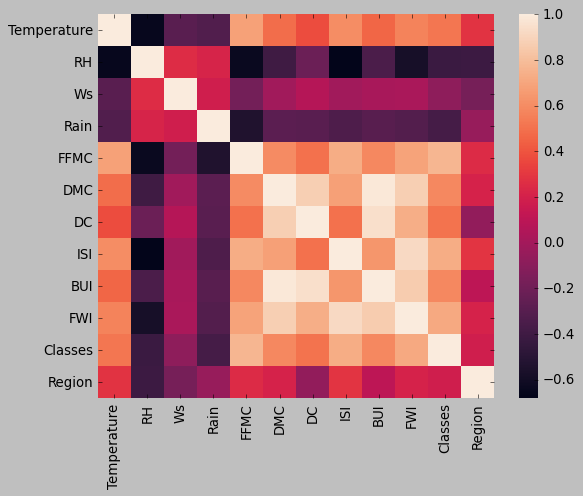

In [133]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

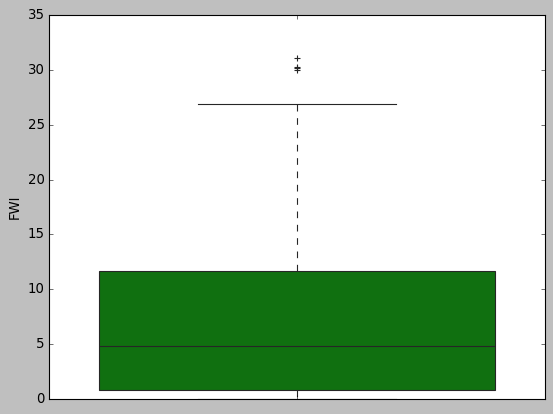

In [135]:
## Box Plots
sns.boxplot(df_copy['FWI'],color='green')

In [137]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1,3.9,0.5,0,0


In [138]:
df_copy['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

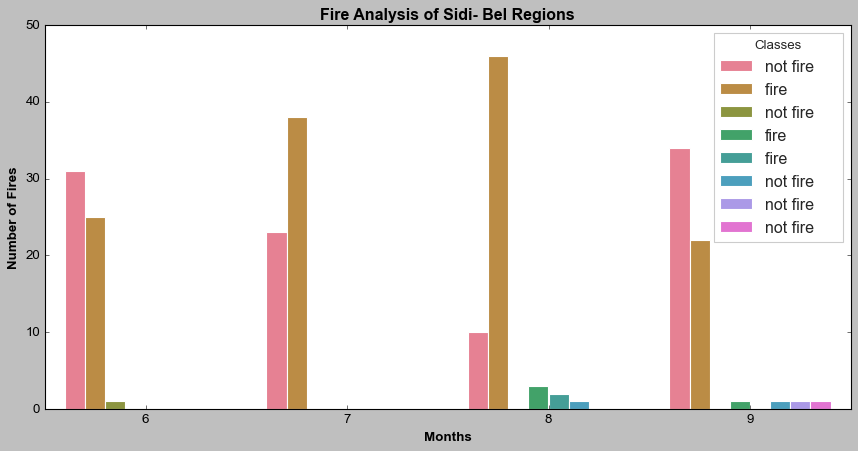

In [139]:
## Monthly Fire Analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

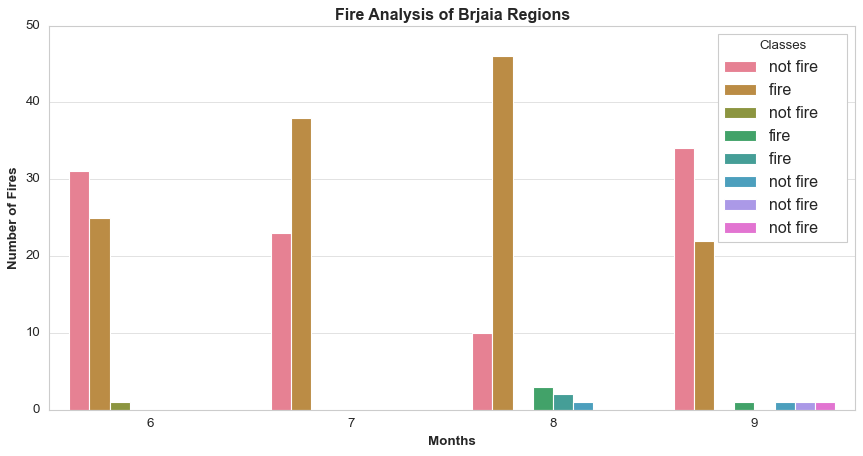

In [140]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September